In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df['Title'] = df['Name'].str.extract('([A-Za-z])+\.', expand=False)
title_map = {
    'Mme': 'Mrs', 'Ms': 'Miss', 'Lady': 'Rare', 'Countess': 'Rare',
    'Don': 'Mr', 'Rev': 'Rare', 'Dr': 'Rare', 'Major': 'Rare',
    'Sir': 'Rare', 'Col': 'Rare', 'Capt': 'Rare',
    'Jonkheer': 'Rare', 'Dona': 'Rare', 'Mlle': 'Miss' # Adding Mlle to Miss
}
df['Title'] = df['Title'].replace(title_map)

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
C:\Users\susin\AppData\Local\Temp\ipykernel_31172\2677206547.py:1: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df['Name'].str.extract('([A-Za-z])+\.', expand=False)


In [7]:
df['Age'] = df.groupby('Title')['Age'].transform(lambda x: x.fillna(x.median()))
print(df['Age'].isnull().sum())

0


In [8]:
df['Has_Cabin'] = df['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)

In [9]:
df.drop('Cabin', axis=1, inplace=True)

In [10]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [11]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
Has_Cabin      0
dtype: int64

In [12]:
df['Family_size'] = df['Parch'] + df['SibSp'] + 1

In [13]:
import numpy as np

In [14]:
df['Is_Alone'] = np.where(df['Family_size'] == 1, 1, 0)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  Title        891 non-null    object 
 12  Has_Cabin    891 non-null    int64  
 13  Family_size  891 non-null    int64  
 14  Is_Alone     891 non-null    int64  
dtypes: float64(2), int64(8), object(5)
memory usage: 104.5+ KB


In [17]:
import matplotlib.pyplot as plt, seaborn as sns

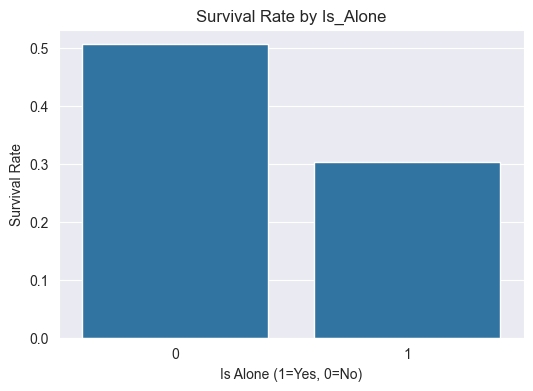

In [18]:
plt.figure(figsize=(6,4))
sns.barplot(x='Is_Alone', y='Survived', data=df, errorbar=None)
plt.title('Survival Rate by Is_Alone')
plt.xlabel('Is Alone (1=Yes, 0=No)')
plt.ylabel('Survival Rate')
plt.show()

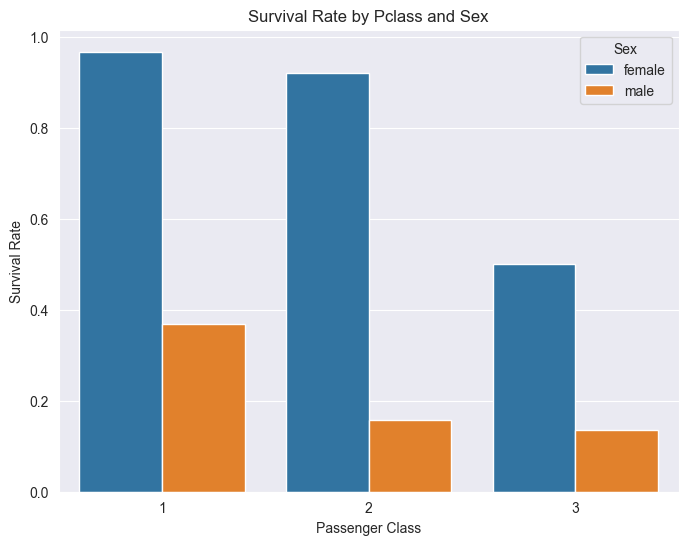

In [19]:
plt.figure(figsize=(8,6))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df, errorbar=None)
plt.title('Survival Rate by Pclass and Sex')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

In [20]:
from sqlalchemy import create_engine

# Step 1: Connect to PostgreSQL
username = "postgres"
password = "2006"
host = "localhost"
port = "5432"
database = "titanic"

engine = create_engine(f"postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}")

# Step 2: Load DataFrame into PostgreSQL
table_name = "titanic"
df.to_sql(table_name, engine, if_exists="replace", index=False)

print(f"Data successfully loaded into table '{table_name}' in database '{database}'.")

Data successfully loaded into table 'titanic' in database 'titanic'.
